In [6]:
import pandas as pd
import matplotlib.pyplot as plot
import statsmodels.api as stats
import numpy as np

In [23]:
insurance_df = pd.read_csv(r"C:\Users\dnsim\OneDrive\Documents\Finance\auto_insurance_sweden.csv")
insurance_df.head

<bound method NDFrame.head of     claims  payment
0      108    392.5
1       19     46.2
2       13     15.7
3      124    422.2
4       40    119.4
..     ...      ...
58       9     87.4
59      31    209.8
60      14     95.5
61      53    244.6
62      26    187.5

[63 rows x 2 columns]>

In [8]:
insurance_df.shape

(63, 2)

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

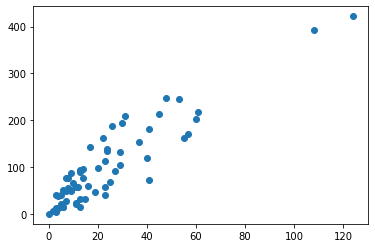

In [9]:
plot.scatter(insurance_df.claims, insurance_df.payment)
plot.xlable('Claims')
plot.ylable('payment[100k Kroner]')
plot.show()

In [10]:
y_insurance = insurance_df.payment
x_insurance = stats.add_constant(insurance_df['claims'])

In [11]:
model_insurance = stats.OLS(y_insurance, x_insurance)
results_insurance =model_insurance.fit()


In [12]:
model_insurance = stats.OLS(y_insurance, x_insurance)
results_insurance =model_insurance.fit()


                            OLS Regression Results                            
Dep. Variable:                payment   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     305.0
Date:                Mon, 15 May 2023   Prob (F-statistic):           2.05e-25
Time:                        21:46:16   Log-Likelihood:                -314.04
No. Observations:                  63   AIC:                             632.1
Df Residuals:                      61   BIC:                             636.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9945      6.368      3.140      0.0

In [21]:
intercept_insurance = results_insurance.params[0]
experience_coeff = results_insurance.params[1]
ssr_insurance  = results_insurance.ssr

print('the intercept value is',intercept_insurance )
print('The coefficient(slope) is', experience_coeff)
print('The sum of square residuals is:', ssr_insurance)

the intercept value is 19.994485759114866
The coefficient(slope) is 3.4138235600663664
The sum of square residuals is: 78796.74155103252


AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

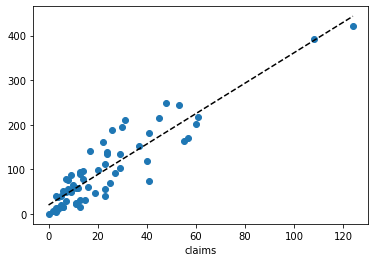

In [31]:
#observations

plot.scatter(insurance_df.claims, insurance_df.payment, label ='Observed')


#Line of best fit
x_synthetic = np.linspace(0,insurance_df.claims.max(),50)
y_pred_payment =x_synthetic * experience_coeff +intercept_insurance
plot.plot(x_synthetic, y_pred_payment, color = 'k', ls='--', label ='Model')


#plot the chart
plot.xlabel('claims')
plot.ylable(payments)
plot.legend()
plot.show()